In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
df_train.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


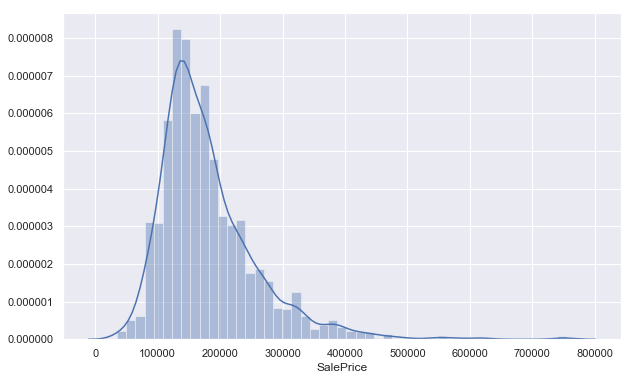

In [5]:
plt.figure(figsize=(10,6))
sns.set()
sns.distplot(df_train['SalePrice'])
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


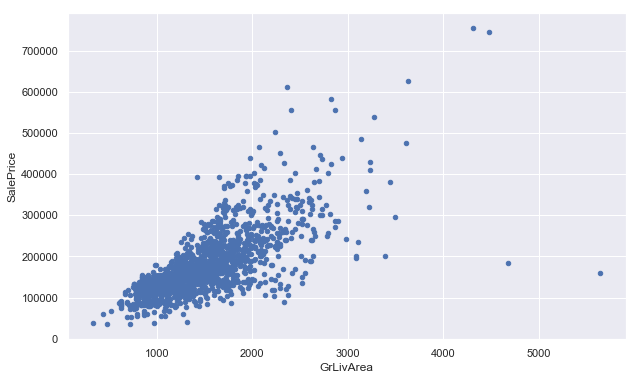

In [6]:
f,axis = plt.subplots(figsize = (10,6))
data = pd.concat([df_train['GrLivArea'],df_train['SalePrice']],axis = 1)
f = data.plot.scatter(y = 'SalePrice',x = 'GrLivArea',ax =axis)

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


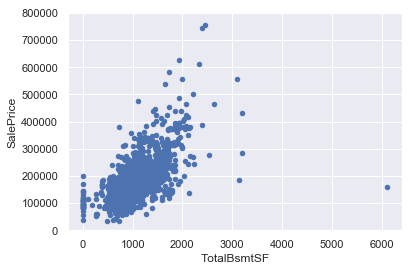

In [7]:
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
data.plot.scatter(x="TotalBsmtSF", y='SalePrice', ylim=(0,800000))

[(0, 800000)]

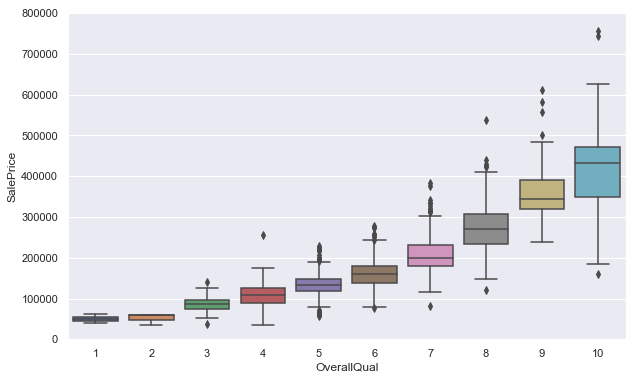

In [8]:
fig ,qaxis = plt.subplots(figsize =(10,6))
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
fig = sns.boxplot(data = data,x = 'OverallQual',y = 'SalePrice')
qaxis.set(ylim=(0,800000))

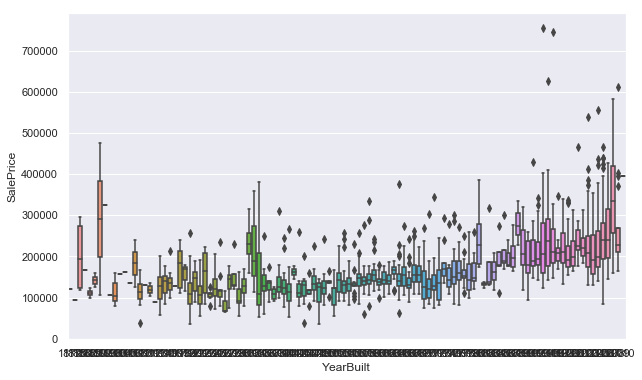

In [9]:
a = plt.figure(figsize = (10,6))

data = pd.concat([df_train['YearBuilt'],df_train['SalePrice']],axis = 1)
sns.boxplot(data = data ,x = 'YearBuilt',y = 'SalePrice')
plt.show()

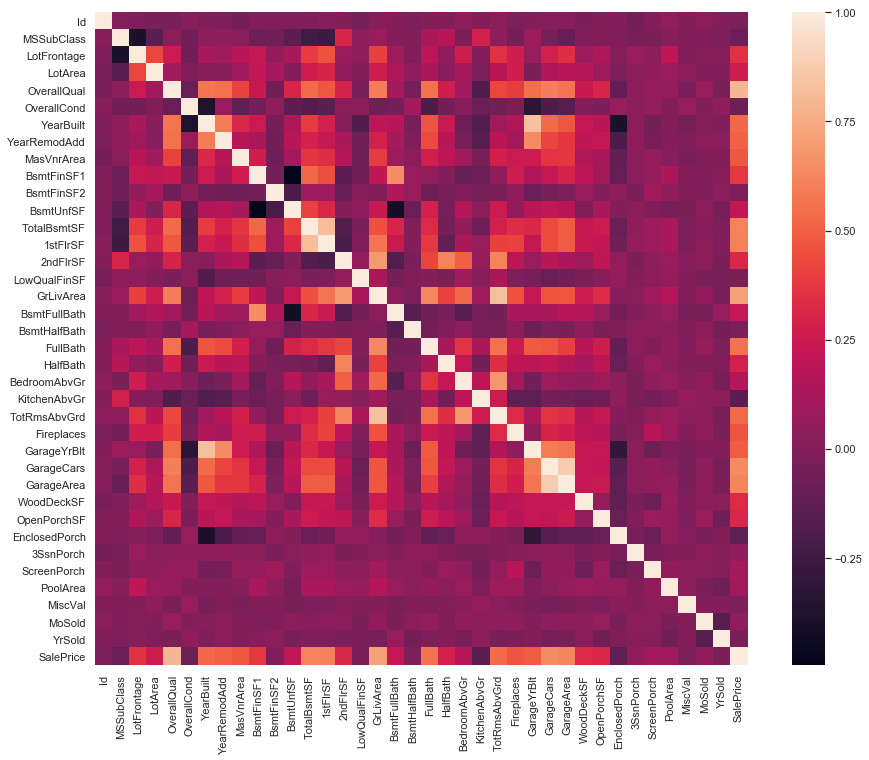

In [10]:
plt.figure(figsize = (16,12))
sns.heatmap(df_train.corr(),square = True)

In [13]:
val = df_train.corr()
col = val.nlargest(10,'SalePrice').index
col

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

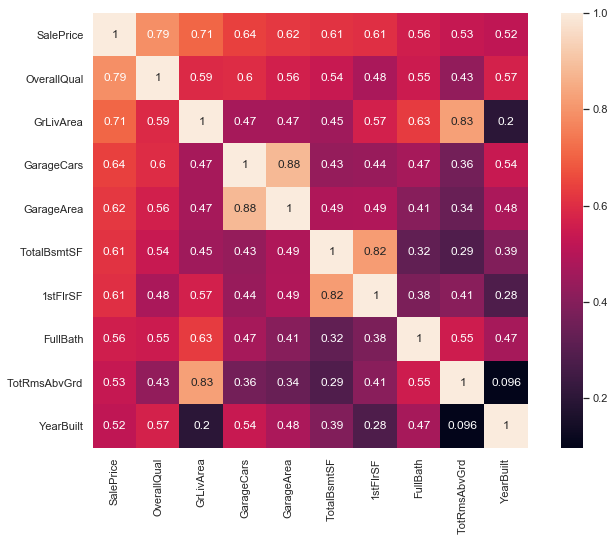

In [32]:
data_heat = pd.DataFrame(np.corrcoef(df_train[col].values.T),index = col,columns = col)
plt.figure(figsize = (12,8))
sns.heatmap(data_heat,square = True,annot = True)
plt.show()

In [33]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


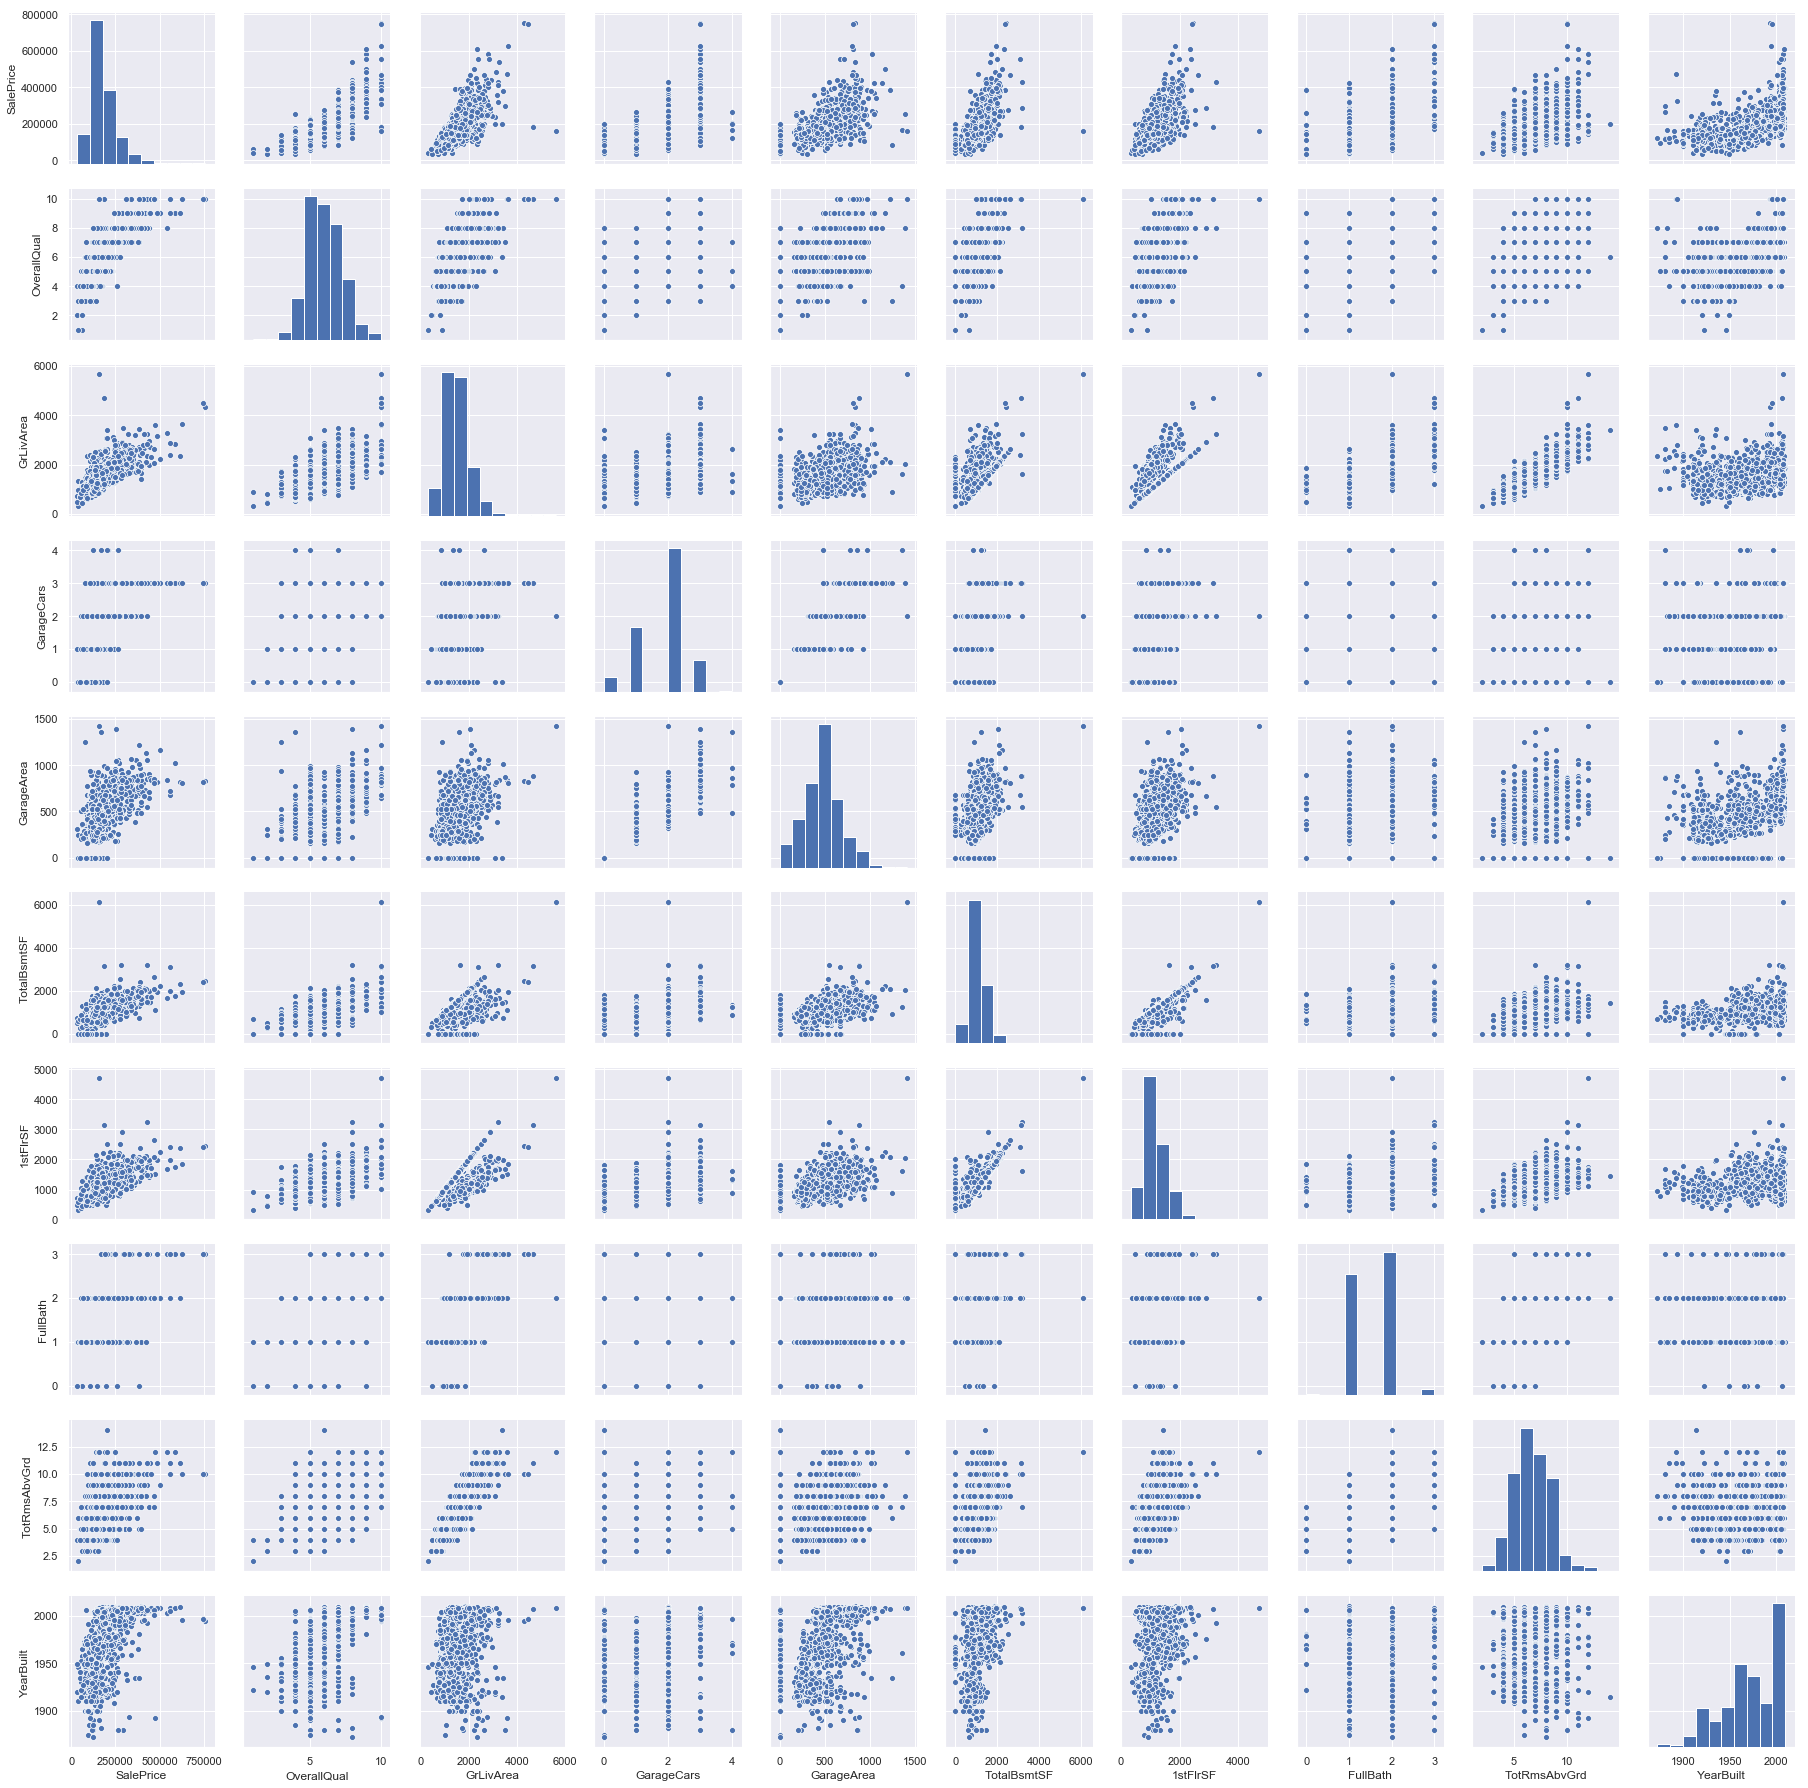

In [36]:
sns.pairplot(df_train[col])

In [51]:
miss_acount = df_train.isnull().sum().sort_values(ascending = False)
miss_rate = missing_acount/df_train.shape[0]
miss_overview = pd.concat([acount,rate],axis = 1,keys = ['acount','rate'])
miss_overview.head(20)

,acount,rate
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [55]:
df_train.drop(miss_overview[miss_overview.acount>1].index,axis = 1,inplace = True)

In [59]:
df_train.isnull().sum().sort_values(ascending = False).head()

Electrical    1
SalePrice     0
Heating       0
BsmtUnfSF     0
BsmtFinSF2    0
dtype: int64

In [34]:
df_train['TotalBsmtSF'].value_counts().sort_index(ascending = True)[:1]

0    37
Name: TotalBsmtSF, dtype: int64

In [38]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


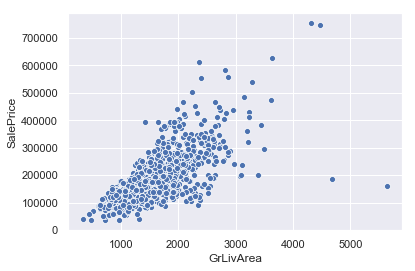

In [69]:
data = pd.concat([df_train['GrLivArea'],df_train['SalePrice']],axis = 1)
sns.scatterplot(data = data,x = 'GrLivArea',y = 'SalePrice')
plt.show()

In [75]:
data.sort_values(by = 'GrLivArea',ascending = False).head()

,GrLivArea,SalePrice
1298,5642,160000
523,4676,184750
1182,4476,745000
691,4316,755000
1169,3627,625000


In [78]:
df_train.loc[1298][['GrLivArea','SalePrice']]

GrLivArea      5642
SalePrice    160000
Name: 1298, dtype: object

In [113]:
df_train.drop([1298,523],inplace = True)

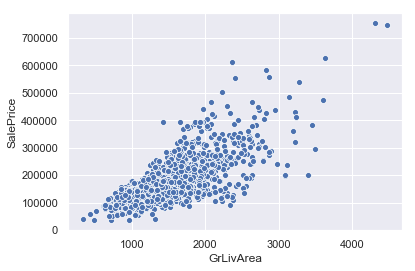

In [114]:
data = pd.concat([df_train['GrLivArea'],df_train['SalePrice']],axis = 1)
sns.scatterplot(data = data,x = 'GrLivArea',y = 'SalePrice')
plt.show()

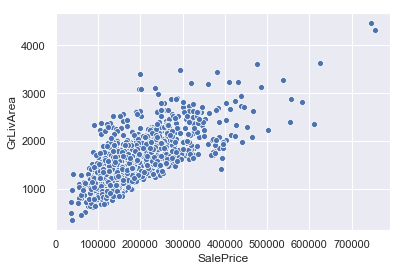

In [119]:
data = pd.concat([df_train['GrLivArea'],df_train['SalePrice']],axis = 1)
sns.scatterplot(data = data,x = 'SalePrice',y = 'GrLivArea')

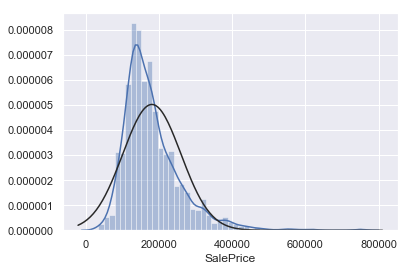

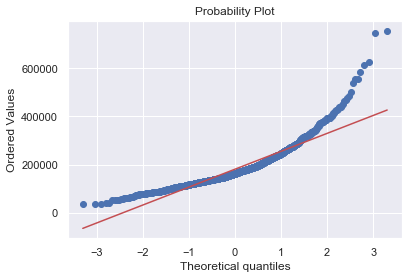

In [172]:
a = sns.distplot(df_train['SalePrice'],fit = norm)

plt.figure()
b = stats.probplot(df_train['SalePrice'],plot = plt)

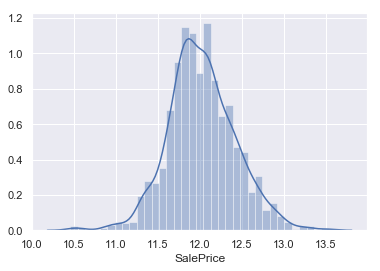

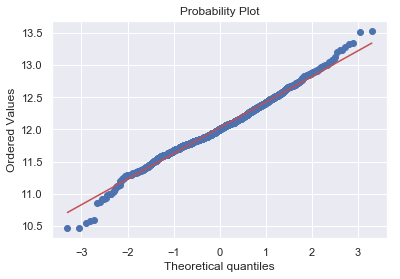

In [180]:
_ = sns.distplot(np.log(df_train['SalePrice']))

plt.figure()

_ = stats.probplot(np.log(df_train['SalePrice']),plot = plt)

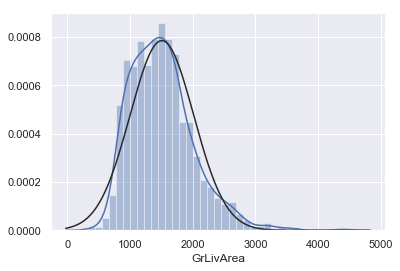

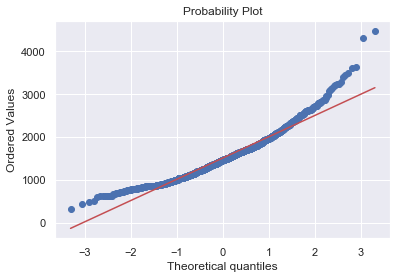

In [184]:
_ = sns.distplot(df_train['GrLivArea'],fit = norm)

plt.figure()

_ = stats.probplot(df_train['GrLivArea'],plot = plt)

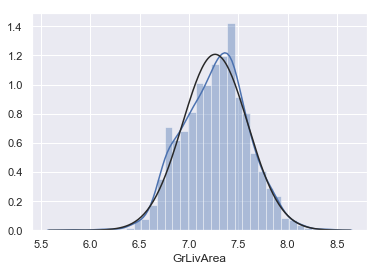

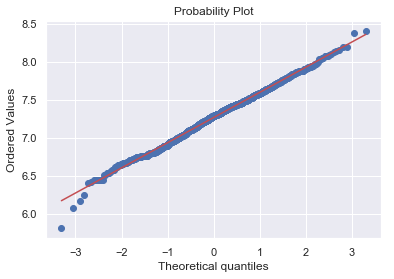

In [188]:
_ = sns.distplot(np.log(df_train['GrLivArea']),fit = norm)

plt.figure()

_ = stats.probplot(np.log(df_train['GrLivArea']),plot = plt)

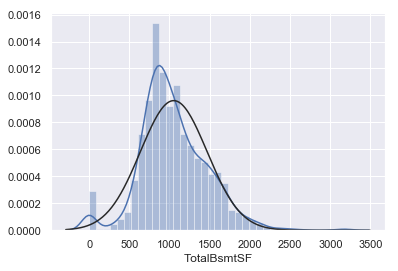

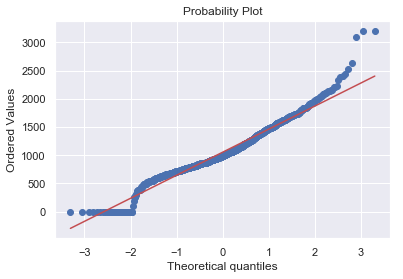

In [193]:
_ = sns.distplot(df_train['TotalBsmtSF'],fit = norm)

plt.figure()

_ = stats.probplot(df_train['TotalBsmtSF'],plot = plt)

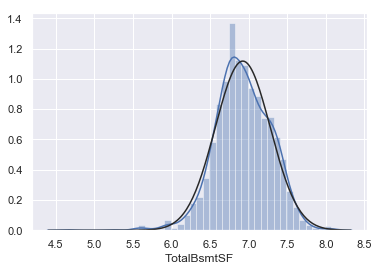

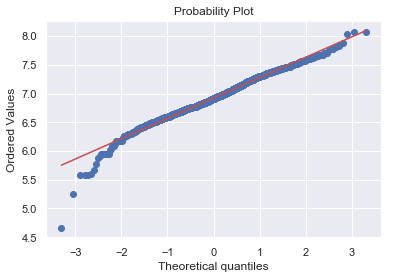

In [200]:
_  = sns.distplot(np.log(df_train[df_train['TotalBsmtSF']!=0]['TotalBsmtSF']),fit = norm)
plt.figure()

_ = stats.probplot(np.log(df_train[df_train['TotalBsmtSF']!=0]['TotalBsmtSF']),plot = plt)

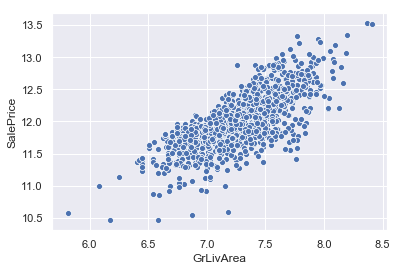

In [206]:
sns.scatterplot(np.log(df_train['GrLivArea']),np.log(df_train['SalePrice']))

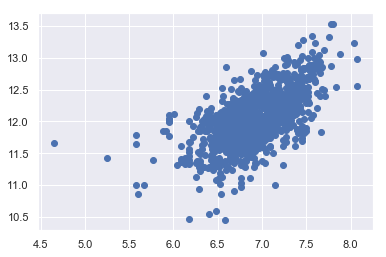

In [208]:
plt.scatter(np.log(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF']), np.log(df_train[df_train['TotalBsmtSF']>0]['SalePrice']));